In [2]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv(r"energy_dataset.csv")
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [5]:
df.isna().sum().sum()

70529

In [6]:
df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [7]:
df.shape

(35064, 29)

In [86]:
df.drop(["forecast wind offshore eday ahead", "generation hydro pumped storage aggregated"], axis=1, inplace=True)

In [87]:
df = df.ffill().bfill()

In [10]:
df.isna().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil coal-derived gas           35064 non-null  float64
 4   generation fossil gas                        35064 non-null  float64
 5   generation fossil hard coal                  35064 non-null  float64
 6   generation fossil oil                        35064 non-null  float64
 7   generation fossil oil shale                  35064 non-null  float64
 8   generation fossil peat                       35064 non-null  float64
 9   generation geothermal                        35064 non-null  float64
 10

In [88]:
df.drop('time', axis=1, inplace = True)

In [13]:
df.shape

(35064, 26)

In [14]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [105]:
x = df.drop("total load forecast",axis=1)
y = df["total load forecast"]

In [16]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**K-BEST**

In [41]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x, y)
mutual_info

array([4.15418606e-02, 1.01594974e-01, 0.00000000e+00, 2.21128053e-01,
       1.17828086e-01, 1.88299031e-01, 2.43539208e-05, 5.28230061e-04,
       7.43010857e-06, 3.08548298e-01, 8.08908532e-02, 1.77479289e-01,
       5.01068720e-04, 8.98000699e-02, 9.57701952e-02, 3.22169038e-02,
       1.37719536e-01, 2.51751526e-02, 5.01085671e-04, 1.19486619e-02,
       1.48028656e-01, 1.45738614e-02, 2.39426273e+00, 1.71503383e-01,
       1.31404701e-01])

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

total load actual                              2.394263
generation hydro pumped storage consumption    0.308548
generation fossil gas                          0.221128
generation fossil oil                          0.188299
generation hydro water reservoir               0.177479
price day ahead                                0.171503
forecast solar day ahead                       0.148029
generation solar                               0.137720
price actual                                   0.131405
generation fossil hard coal                    0.117828
generation fossil brown coal/lignite           0.101595
generation other                               0.095770
generation nuclear                             0.089800
generation hydro run-of-river and poundage     0.080891
generation biomass                             0.041542
generation other renewable                     0.032217
generation waste                               0.025175
forecast wind onshore day ahead                0

<Axes: >

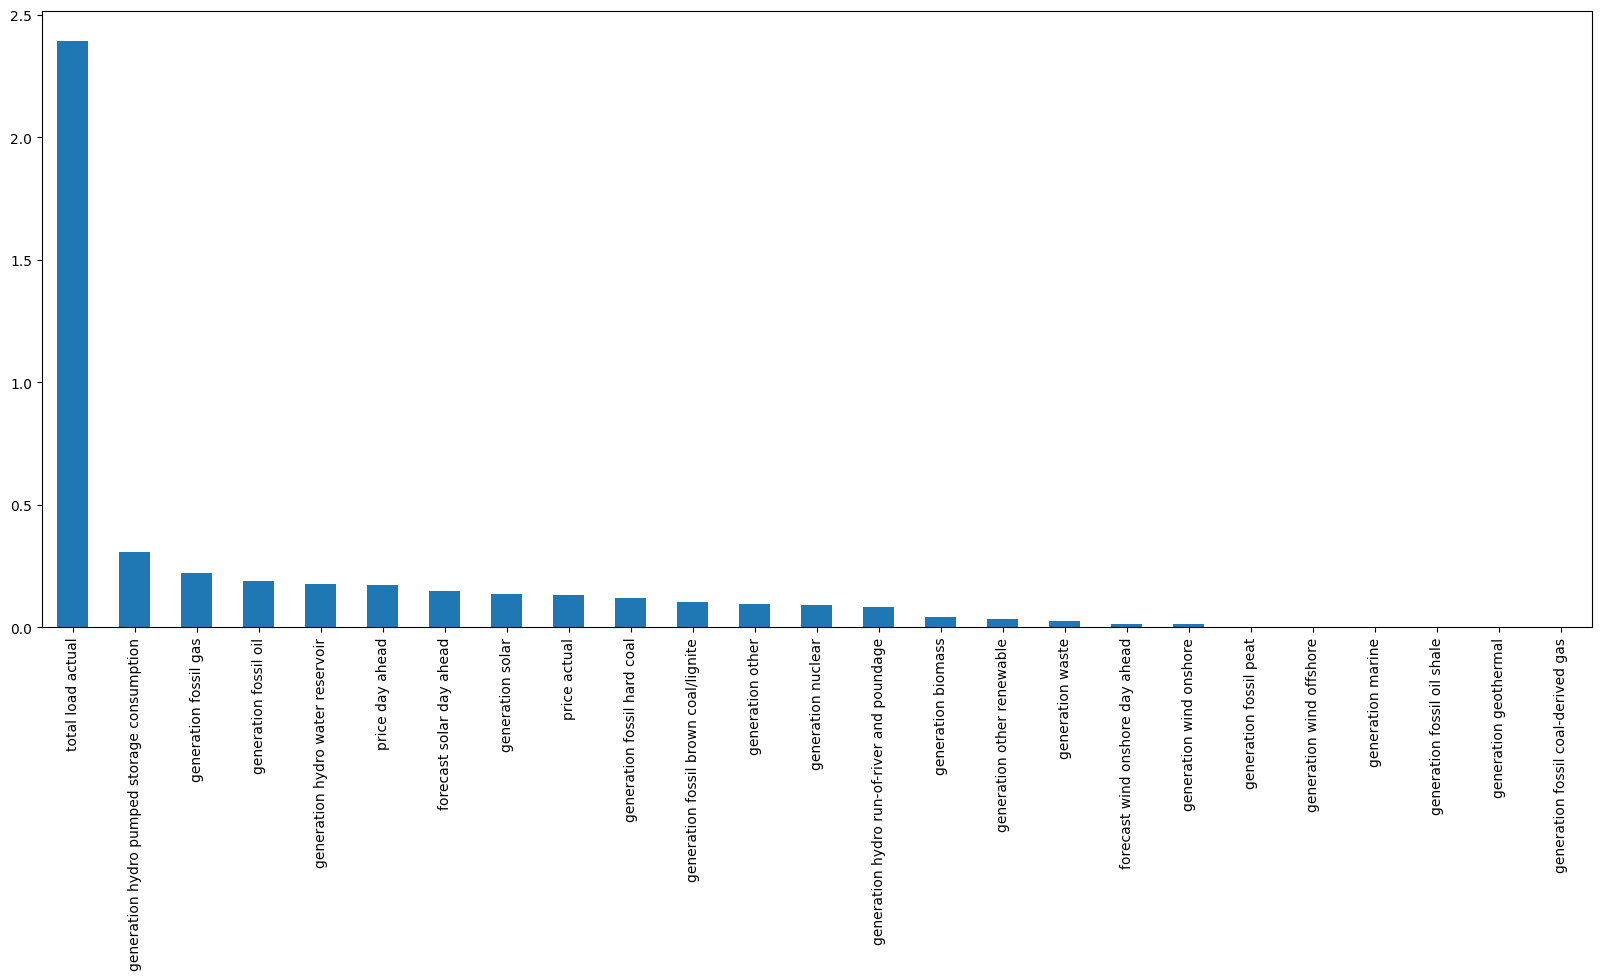

In [43]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [44]:
from sklearn.feature_selection import SelectKBest

select_8_columns = SelectKBest(mutual_info_regression, k=8)
select_8_columns.fit(x, y)
x.columns[select_8_columns.get_support()]

Index(['generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro water reservoir', 'generation solar',
       'forecast solar day ahead', 'total load actual', 'price day ahead'],
      dtype='object')

In [106]:
x = x[['generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro water reservoir', 'generation solar',
       'forecast solar day ahead','total load actual', 'price day ahead']]

In [91]:
x.head()

,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro water reservoir,generation solar,forecast solar day ahead
0,4844.0,162.0,863.0,1899.0,49.0,17.0
1,5196.0,158.0,920.0,1658.0,50.0,16.0
2,4857.0,157.0,1164.0,1371.0,50.0,8.0
3,4314.0,160.0,1503.0,779.0,50.0,2.0
4,4130.0,156.0,1826.0,720.0,42.0,9.0


In [92]:
y.head()

0    26118.0
1    24934.0
2    23515.0
3    22642.0
4    21785.0
Name: total load forecast, dtype: float64

### **Random Forest**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(ccp_alpha=0.0012)
rf.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=0.0012)

In [99]:
y_pred = rf.predict(x_train)
r2_rf = r2_score(y_train, y_pred)
mse_rf = mean_squared_error(y_train, y_pred)

print(f"Accuracy = {r2_rf}")
print(f"MSE = {mse_rf}")

Accuracy = 0.9726506042340957
MSE = 575243.9790213712


In [100]:
y_pred = rf.predict(x_test)
r2_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

print(f"Accuracy = {r2_rf}")
print(f"MSE = {mse_rf}")

Accuracy = 0.8109207533244209
MSE = 4021879.8643916924


### **AdaBoost**

In [104]:
from sklearn.tree import DecisionTreeClassifier
adb = DecisionTreeClassifier()
adb.fit(x_train, y_train)

y_pred = adb.predict(x_train)
r2_adb = r2_score(y_train, y_pred)
mse_adb = mean_squared_error(y_train, y_pred)

print(f"Accuracy = {r2_adb}")
print(f"MSE = {mse_adb}")

Accuracy = 1.0
MSE = 0.0


In [102]:
y_pred = adb.predict(x_test)
r2_adb = r2_score(y_test, y_pred)
mse_adb = mean_squared_error(y_test, y_pred)

print(f"Accuracy = {r2_adb}")
print(f"MSE = {mse_adb}")

Accuracy = 0.6922730427435222
MSE = 6545619.759337668


### **LSTM**

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reshaping x for RNN input: RNN expects input in the shape [samples, time steps, features]
x_scaled = x_scaled.reshape((x_scaled.shape[0], 1, x_scaled.shape[1]))

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=1)

In [47]:
# Building the RNN model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))

# Adding output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Training the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
1534/1534 [==============================] - 8s 4ms/step - loss: 492783200.0000 - mae: 20172.7188 - val_loss: 63855164.0000 - val_mae: 6358.0874
Epoch 2/100
1534/1534 [==============================] - 5s 3ms/step - loss: 52986416.0000 - mae: 5732.1592 - val_loss: 25076456.0000 - val_mae: 3822.8091
Epoch 3/100
1534/1534 [==============================] - 6s 4ms/step - loss: 35615392.0000 - mae: 4697.7373 - val_loss: 15087890.0000 - val_mae: 2965.2693
Epoch 4/100
1534/1534 [==============================] - 6s 4ms/step - loss: 28710736.0000 - mae: 4234.6567 - val_loss: 10341279.0000 - val_mae: 2462.3330
Epoch 5/100
1534/1534 [==============================] - 6s 4ms/step - loss: 24835020.0000 - mae: 3942.7781 - val_loss: 8078309.5000 - val_mae: 2184.1909
Epoch 6/100
1534/1534 [==============================] - 5s 3ms/step - loss: 23195388.0000 - mae: 3824.8625 - val_loss: 7079214.0000 - val_mae: 2047.6272
Epoch 7/100
1534/1534 [==============================] - 7s 5ms/step -

In [50]:
# Save the LSTM model to an .h5 file
model.save('LSTM_model.h5')

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# Predicting and evaluating the model
y_pred = model.predict(x_train)

# Evaluating the model
r2_train = r2_score(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)

print("R2 Score:", r2_train)
print("Mean Squared Error:", mse_train)

767/767 [==============================] - 2s 2ms/step
R2 Score: 0.7401135584652374
Mean Squared Error: 5466230.844797544


In [49]:
# Predicting and evaluating the model
y_pred = model.predict(x_test)

# Evaluating the model
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2_test)
print("Mean Squared Error:", mse_test)

329/329 [==============================] - 1s 2ms/step
R2 Score: 0.741212786139623
Mean Squared Error: 5504628.894428026


### **RNN**

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
import pickle

In [122]:
df = pd.read_csv("Final_data.csv")

In [123]:
# Separate features and target
X = df.drop(columns=['total load forecast'])
y = df['total load forecast']

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for RNN [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# RNN Model
model = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
702/702 [==============================] - 6s 4ms/step - loss: 0.0094 - mae: 0.0642 - val_loss: 7.6766e-04 - val_mae: 0.0212
Epoch 2/50
702/702 [==============================] - 2s 4ms/step - loss: 0.0029 - mae: 0.0406 - val_loss: 6.3924e-04 - val_mae: 0.0191
Epoch 3/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 8.0619e-04 - val_mae: 0.0221
Epoch 4/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0016 - mae: 0.0300 - val_loss: 4.3420e-04 - val_mae: 0.0151
Epoch 5/50
702/702 [==============================] - 2s 4ms/step - loss: 0.0014 - mae: 0.0274 - val_loss: 4.5519e-04 - val_mae: 0.0156
Epoch 6/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0012 - mae: 0.0258 - val_loss: 6.4608e-04 - val_mae: 0.0195
Epoch 7/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0011 - mae: 0.0250 - val_loss: 5.0504e-04 - val_mae: 0.0167
Epoch 8/50
702/702 [============================

In [124]:
# Save the scalers to disk
with open('scaler_X.pkl', 'wb') as file_X:
    pickle.dump(X_scaled, file_X)

with open('scaler_y.pkl', 'wb') as file_y:
    pickle.dump(y_scaled, file_y)

In [125]:
# Predicting and evaluating the model
y_pred = model.predict(X_train_reshaped)
y_train_pred = scaler_y.inverse_transform(y_pred)
y_train_actual = scaler_y.inverse_transform(y_train)

# Evaluating the model
r2_train = r2_score(y_train_actual, y_train_pred)
mse_train = mean_squared_error(y_train_actual, y_train_pred)

print("R2 Score:", r2_train)
print("Mean Squared Error:", mse_train)

877/877 [==============================] - 2s 2ms/step
R2 Score: 0.9757937472285323
Mean Squared Error: 511457.681211149


In [126]:
# Predicting and evaluating the model
y_pred = model.predict(X_test_reshaped)
y_test_pred = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluating the model
r2_train = r2_score(y_test_actual, y_test_pred)
mse_train = mean_squared_error(y_test_actual, y_test_pred)

print("R2 Score:", r2_train)
print("Mean Squared Error:", mse_train)

220/220 [==============================] - 0s 2ms/step
R2 Score: 0.9749889616765578
Mean Squared Error: 525451.6415365201


In [127]:
# Save the LSTM model to an .h5 file
model.save('RNN_model.h5')

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
# Combine X and y into one DataFrame
data = pd.concat([x, y], axis=1)

# Save the DataFrame to a CSV file
data.to_csv('Final_data.csv', index=False)

### **RNN For Prize**

In [80]:
df1 = pd.read_csv("energy_dataset.csv")
df1 = df1.ffill().bfill()
df1.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [81]:
input = df1[['generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro water reservoir', 'generation solar',
       'forecast solar day ahead']]

In [82]:
# Separate features and target
X = input
y = df1['price actual']

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for RNN [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# RNN Model
rnn = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = rnn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
702/702 [==============================] - 6s 4ms/step - loss: 0.0172 - mae: 0.1008 - val_loss: 0.0125 - val_mae: 0.0869
Epoch 2/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0128 - mae: 0.0872 - val_loss: 0.0116 - val_mae: 0.0816
Epoch 3/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0121 - mae: 0.0843 - val_loss: 0.0114 - val_mae: 0.0803
Epoch 4/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0117 - mae: 0.0827 - val_loss: 0.0112 - val_mae: 0.0798
Epoch 5/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0115 - mae: 0.0820 - val_loss: 0.0111 - val_mae: 0.0793
Epoch 6/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0113 - mae: 0.0807 - val_loss: 0.0109 - val_mae: 0.0781
Epoch 7/50
702/702 [==============================] - 3s 4ms/step - loss: 0.0112 - mae: 0.0805 - val_loss: 0.0116 - val_mae: 0.0812
Epoch 8/50
702/702 [==============================] - 3s 4ms/step - loss: 0.

In [83]:
# Predicting and evaluating the model
y_pred = rnn.predict(X_train_reshaped)
y_train_pred = scaler_y.inverse_transform(y_pred)
y_train_actual = scaler_y.inverse_transform(y_train)

# Evaluating the model
r2_train = r2_score(y_train_actual, y_train_pred)
mse_train = mean_squared_error(y_train_actual, y_train_pred)

print("R2 Score:", r2_train)
print("Mean Squared Error:", mse_train)

877/877 [==============================] - 2s 2ms/step
R2 Score: 0.40370214120698455
Mean Squared Error: 120.10629932046358


In [84]:
# Predicting and evaluating the model
y_pred = rnn.predict(X_test_reshaped)
y_test_pred = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluating the model
r2_train = r2_score(y_test_actual, y_test_pred)
mse_train = mean_squared_error(y_test_actual, y_test_pred)

print("R2 Score:", r2_train)
print("Mean Squared Error:", mse_train)

220/220 [==============================] - 0s 2ms/step
R2 Score: 0.3812544794157018
Mean Squared Error: 125.64737457722154


In [ ]:
# Save the LSTM model to an .h5 file
model.save('RNN_model_Price.h5')

# **----------------------------------------END--------------------------------------------**

## **Forecating**

In [8]:
df1 = df.reset_index()['total load forecast']
df1.head()

0    26118.0
1    24934.0
2    23515.0
3    22642.0
4    21785.0
Name: total load forecast, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [11]:
# Split into train and test sets
training_size = int(len(df1) * 0.65)
training_size

22791

In [12]:
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [37]:
train_data

array([[0.34412712],
       [0.29327893],
       [0.23233842],
       ...,
       [0.54077732],
       [0.51767232],
       [0.4617565 ]])

In [38]:
test_data

array([[0.42598239],
       [0.41683487],
       [0.41735023],
       ...,
       [0.42078591],
       [0.31543912],
       [0.27137642]])

In [39]:
len(train_data)

22791

In [40]:
len(test_data)

12273

In [41]:
# Define function to create dataset matrices based on time_step
def create_dataset(dataset, time_step=22690):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        dataX.append(dataset[i:(i + time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sqlalchemy import create_engine
import numpy as np
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
# Using time_step = 22690 as expected by the model
time_step = 22690
if len(train_data) > time_step and len(test_data) > 0 :
    X_train, y_train = create_dataset(train_data, time_step)
    # X_test, y_test = create_dataset(test_data, time_step)

    # Reshape for the model input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

     # Load the pre-trained model
    new_model = load_model('model.h5')
    
    # Generate predictions and inverse transform to original scale
    train_predict = new_model.predict(X_train)
    # test_predict = new_model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    # test_predict = scaler.inverse_transform(test_predict)

    # Calculate RMSE
    train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
    # test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

    # Forecast future values
    x_input = train_data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    
    lst_output = []
    i = 0
    while i < 5:
        x_input = np.array(temp_input[-time_step:]).reshape((1, time_step, 1))
        yhat = new_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

    # Inverse transform the forecasted results
    result = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))
    print(result)

4/4 [==============================] - 13s 3s/step
[[28903.055]
 [28510.844]
 [28487.266]
 [28985.018]
 [29904.867]]


In [46]:
# # Check if train and test data are sufficient
# time_step=22690
# if len(train_data) > time_step and len(test_data) > 0:
#     X_train, y_train = create_dataset(train_data, time_step)
#     X_test, y_test = create_dataset(test_data, time_step)

#     print(X_train.size, X_test.size)

#     if X_train.size > 0 and X_test.size > 0: # Added validation for the datasets
#         # Reshape for the model input
#         X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#         X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#         # Load the pre-trained model
#         new_model = load_model('model.h5')

#         # Generate predictions and inverse transform to original scale
#         train_predict = new_model.predict(X_train)
#         test_predict = new_model.predict(X_test)

#         train_predict = scaler.inverse_transform(train_predict)
#         test_predict = scaler.inverse_transform(test_predict)

#         # Calculate RMSE
#         train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
#         test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

#         print("Train RMSE:", train_rmse)
#         print("Test RMSE:", test_rmse)

#         # Forecast future values
#         x_input = test_data[-time_step:].reshape(1, -1) if len(test_data) >= time_step else np.array(test_data).reshape(1, -1)
#         temp_input = x_input[0].tolist()
        
#         lst_output = []
#         i = 0
#         while i < 5:
#             x_input = np.array(temp_input[-time_step:]).reshape((1, time_step, 1))
#             yhat = new_model.predict(x_input, verbose=0)
#             temp_input.append(yhat[0][0])
#             lst_output.append(yhat[0][0])
#             i += 1

#         # Inverse transform the forecasted results
#         result = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))
#         print("Forecasted results:", result)

#     else:
#         print("Training or testing set is empty after dataset creation.")
# else:
#     print("Insufficient data for training or testing.")